## Bước 1: Business Understanding

**Objective/Problem**


*   Công ty X chủ yếu phát hành và bán sản
phẩm là CD tới khách hàng.
*   Công ty X mong muốn có thể bán được nhiều sản phẩm hơn cũng như giới thiệu sản phẩm đến đúng đối tượng, chăm sóc và làm hài lòng khách hàng.

Tìm ra giải pháp giúp cải thiện hiệu quả quảng bá, từ đó
giúp tăng doanh thu bán hàng, cải thiện mức độ hài lòng
của khách hàng.

**Mục tiêu/ vấn đề:**


*   Xây dựng hệ thống phân cụm khách hàng dựa trên các thông tin do công ty cung cấp từ đó có thể giúp công ty xác định các nhóm khách hàng khác nhau
để có chiến lược kinh doanh, chăm sóc khách hàng phù
hợp.

## Bước 2: Data Understanding/ Acquire

*   Từ mục tiêu/ vấn đề đã xác định: Xem xét các dữ liệu cần thiết:

1.   CDNOW_master.txt chứa toàn bộ lịch sử mua hàng từ
quý đầu tiên năm 1997 cho đến hết quý thứ hai năm 1998
(cuối tháng 06/1998) của 23.570 khách hàng đã thực
hiện.
2.   Có 69.659 record, mỗi record có: ID khách hàng, ngày
giao dịch, số lượng đĩa CD đã mua và thành tiền ($USD).
3.  Mô tả dữ liệu: read_me_CDNOW_master.txt – link:
http://brucehardie.com/notes/026/

## Bước 3: Data preparation/ Prepare

### **Data Consolidate:**
*   Collect data
*   Select data
*   Integrate data



In [ ]:
!pip install squarify
#!pip install matplotlib==3.1.3

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

%cd '/content/gdrive/MyDrive/DataScience_MachineLearning/LDS0_k287_ONLINE_NguyenThanhTrong/Project1'

Mounted at /content/gdrive
/content/gdrive/MyDrive/DataScience_MachineLearning/LDS0_k287_ONLINE_NguyenThanhTrong/Project1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

In [ ]:
columns=['user_id','order_date','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names=columns,sep='\s+')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_date      69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [ ]:
df.head()

,user_id,order_date,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [ ]:
# Convert string to date
string_to_date = lambda x: datetime.strptime(str(x), "%Y%m%d").date()
df['order_date'] = df['order_date'].apply(string_to_date)

# Convert date to desired format "%d/%m/%Y"
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df.head()

,user_id,order_date,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,69659.0,11470.854592,6819.904848,1.0,5506.00,11410.00,17273.0,23570.00
order_products,69659.0,2.410040,2.333924,1.0,1.00,2.00,3.0,99.00
order_amount,69659.0,35.893648,36.281942,0.0,14.49,25.98,43.7,1286.01


### **Data Cleaning:**
*   Impute missing values
*   Reduce noise in data
*   Eliminate inconsistencies

In [ ]:
df.isnull().sum()

user_id           0
order_date        0
order_products    0
order_amount      0
dtype: int64

In [ ]:
df.nunique()

user_id           23570
order_date          546
order_products       45
order_amount       8209
dtype: int64

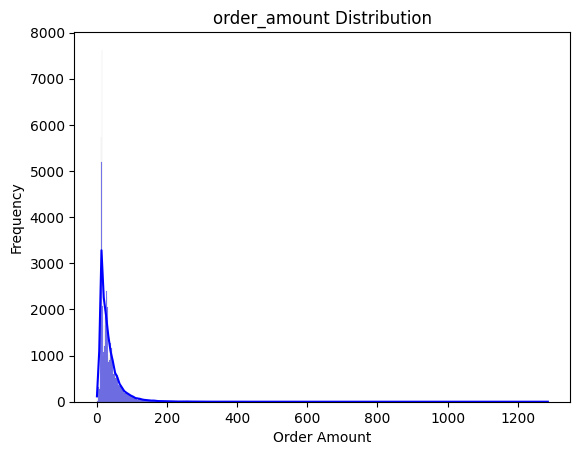

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['order_amount'], color='blue', kde=True)
plt.title("order_amount Distribution")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()

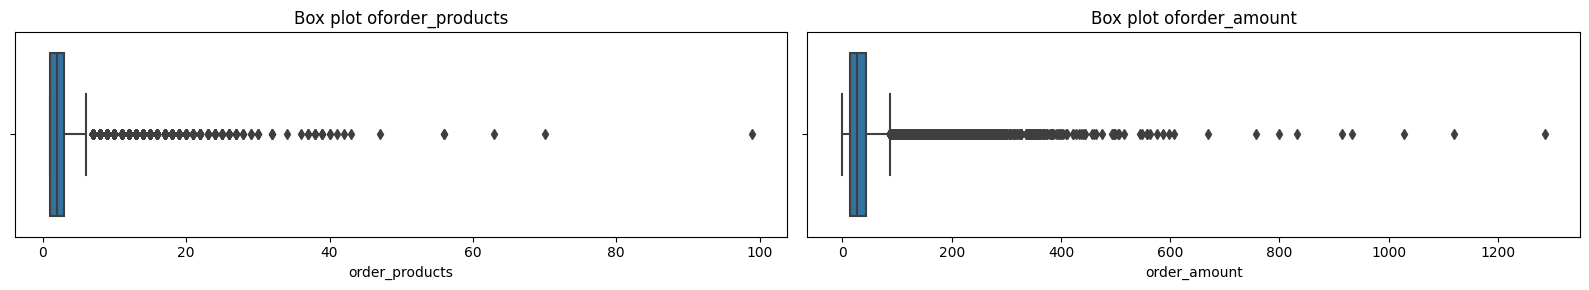

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (16,3))

for i, column in enumerate(['order_products','order_amount']):
  sns.boxplot(x=df[column], ax = axs[i])
  axs[i].set_title('Box plot of' + column)

plt.tight_layout()
plt.show()

*  order_products, order_amount: có outliers


In [ ]:
missing_values = df.isna().sum()
missing_values
# df = df.dropna()

user_id           0
order_date        0
order_products    0
order_amount      0
dtype: int64

*  Dữ liệu không bị thiếu

In [ ]:
# Check for missing values
null_values = df.isnull().sum()
null_values #

user_id           0
order_date        0
order_products    0
order_amount      0
dtype: int64

*  Không có dữ liệu Null

In [ ]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows #

,user_id,order_date,order_products,order_amount
1381,398,1998-05-18,1,12.99
1665,499,1997-10-01,1,11.49
1667,499,1997-10-01,1,15.49
1669,499,1997-10-01,1,13.99
1676,499,1997-10-02,1,11.49
...,...,...,...,...
68228,23043,1997-03-23,1,13.97
68282,23061,1997-04-05,1,14.96
69151,23373,1998-01-14,1,12.99
69178,23380,1998-06-09,1,9.49


* Có 255 dữ liệu bị trùng

In [ ]:
# Remove duplicated rows and keep the first occurrence
df = df.drop_duplicates()
df

,user_id,order_date,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


<ipython-input-17-7a3f2fbe6c0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


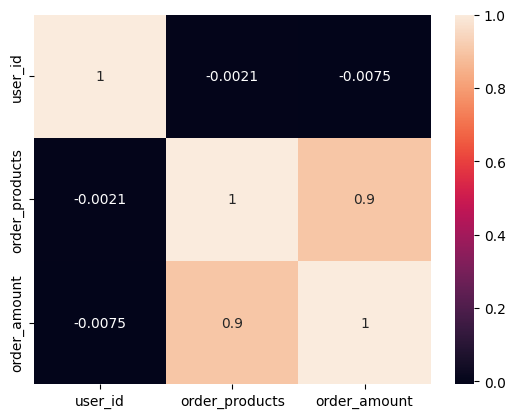

In [ ]:
sns.heatmap(df.corr(),annot = True)
plt.show()

*  Order_amount có tương quan mạnh đối với order_product. Điều này là hợp lý vì order_products càng lớn thì order_amount cũng càng lớn (tỉ lệ thuận)

In [ ]:
# Print DataFrame
df.head(3)

,user_id,order_date,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00


In [ ]:
df.tail(3)

,user_id,order_date,order_products,order_amount
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12
69658,23570,1997-03-26,2,42.96


In [ ]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['order_date'].min(), df['order_date'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df.user_id.isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(df.user_id.unique())))

Transactions timeframe from 1997-01-01 00:00:00 to 1998-06-30 00:00:00
0 transactions don't have a customer id
23,570 unique customer_id


### **Data Transformation:**
*   Normalize data
*   Discretize/ Aggregate data
*   Construct new attributes




In [ ]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

<ipython-input-21-13f4b1e2d1e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_grouped = df.groupby('user_id').sum()


,order_products,order_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [ ]:
df['month'] = df.order_date.values.astype('datetime64[M]')
df.head()

,user_id,order_date,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


<Axes: xlabel='month'>

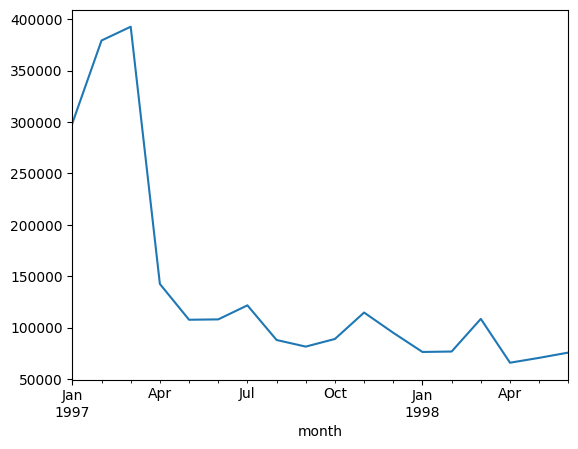

In [ ]:
dfm = df.groupby('month').order_amount.sum()
dfm.plot()

<Axes: xlabel='month'>

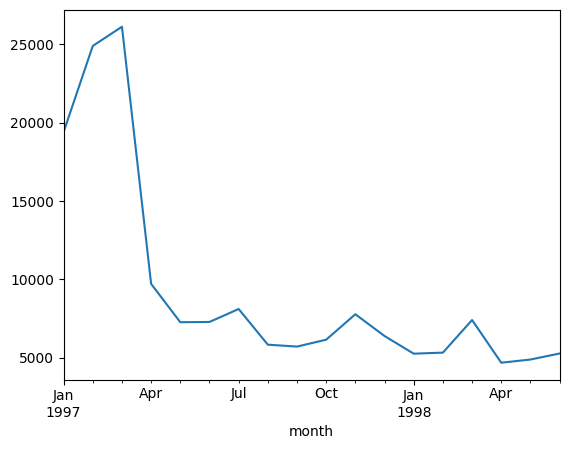

In [ ]:
dfpc = df.groupby('month').order_products.sum()
dfpc.plot()

*  Order_amount và order_product giảm mạnh ở tháng 4-1997 và đi ngang không có dấu hiệu tăng trường trở lại
*  Lượng khách hàng rời bỏ cao, có thể do người dùng đang chuyển sang lưu trữ trên các thiết bị lưu trữ khác như USB. Hoặc người dùng đã chuyển sang nghe nhạc online nhiều hơn là nghe bằng CD
*  Giả thuyết đặt ra: Cần tìm hiểu nhu cầu khách hàng và chuyển đổi mặt hàng kinh doanh

<Axes: xlabel='order_amount', ylabel='order_products'>

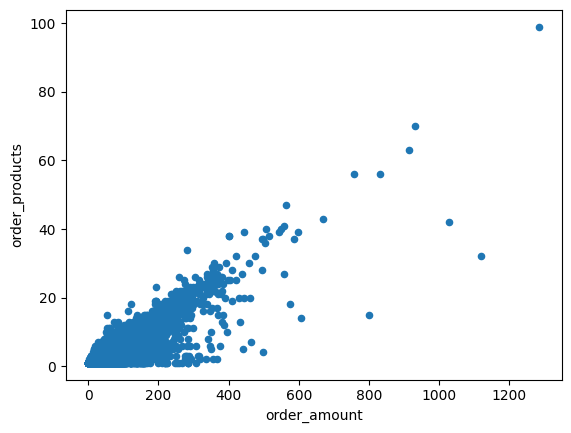

In [ ]:
df.plot.scatter(x= 'order_amount', y = 'order_products')

<Axes: xlabel='order_amount', ylabel='order_products'>

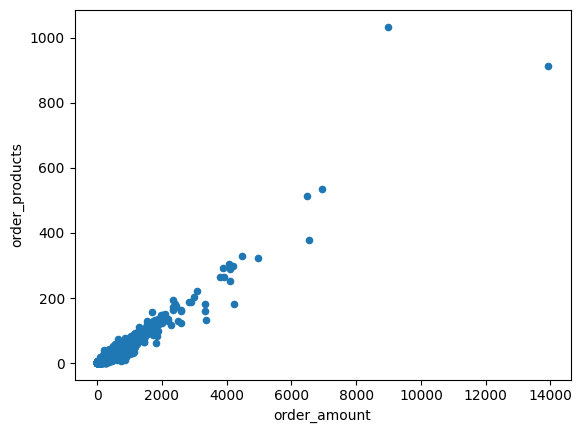

In [ ]:
user_grouped.plot.scatter(x= 'order_amount', y = 'order_products')

*  Khách hàng mua tập trung nhiều ở hóa đơn dưới 2k và số lượng dưới 200

### **Data Reduction:**
*   Reduce number of variables
*   Reduce number of cases
*   Balance skewed data



In [ ]:
# Dữ liệu nhỏ nên không cần

*   Xây dựng giải pháp phân cụm khách hàng theo
RFM.
*   Xây dựng model phân cụm khách hàng theo RFM
phối hợp với thuật toán phân cụm:
1.   RFM + Kmeans (LDS6)
2.   RFM + Hierarchical Clustering (LDS6)
3.   RFM + Kmeans (LDS9)
4.   Các đề xuất khác (+++)
*   Thực hiện so sánh/đánh giá các kết quả


## Bước 4&5: Modeling & Evaluation/ Analyze & Report

### 0.RFM Analysis

#### Create RFM analysis for each customers

In [ ]:
# Phân tích Recency

In [ ]:
max_date = df['order_date'].max().date()
max_date = pd.Timestamp(max_date)

In [ ]:
recency_df = df.groupby(by='user_id', as_index=False)['order_date'].max()
recency_df.columns = ['user_id', 'order_date']

# Convert order_date to datetime object
recency_df['order_date'] = pd.to_datetime(recency_df['order_date'])

recency_df['Recency'] = (max_date - recency_df['order_date']).dt.days
recency_df.drop('order_date', axis=1, inplace=True)  # Drop the unnecessary column
recency_df.head()

,user_id,Recency
0,1,545
1,2,534
2,3,33
3,4,200
4,5,178


In [ ]:
# Phân tích Recency

In [ ]:
frequency_df = df['user_id'].value_counts().reset_index().sort_values(by='user_id')
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
11784,15690,1
15718,5272,1
15717,5271,1
15716,5269,1
15715,5266,1


In [ ]:
# Phân tích Monetary

In [ ]:
# Tạo DataFrame mới 'monetary_df' từ việc nhóm dữ liệu theo 'user_id' và tính tổng 'order_amount'
monetary_df = df.groupby('user_id', as_index=False)['order_amount'].sum()
# Đổi tên cột thành 'user_id' và 'Monetary'
monetary_df.columns = ['user_id', 'Monetary']
monetary_df.head()

,user_id,Monetary
0,1,11.77
1,2,89.00
2,3,156.46
3,4,100.50
4,5,385.61


In [ ]:
temp_df = recency_df.merge(frequency_df,on='user_id')
df_RFM = temp_df.merge(monetary_df,on='user_id')
df_RFM.set_index('user_id',inplace=True)
df_RFM.head()

,Recency,Frequency,Monetary
user_id,,,
1,545,1,11.77
2,534,2,89.00
3,33,6,156.46
4,200,4,100.50
5,178,11,385.61


In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary
user_id,,,
1,545,1,11.77
2,534,2,89.00
3,33,6,156.46
4,200,4,100.50
5,178,11,385.61


In [ ]:
# Rename the columns of DF
df_RFM.columns = ['Recency','Frequency','Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending = False)

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary
user_id,,,
7592,1,200,13925.98
14048,0,217,8976.33
7983,5,148,6960.08
19339,445,56,6552.70
7931,17,62,6497.18


In [ ]:
df_RFM.shape

(23570, 3)

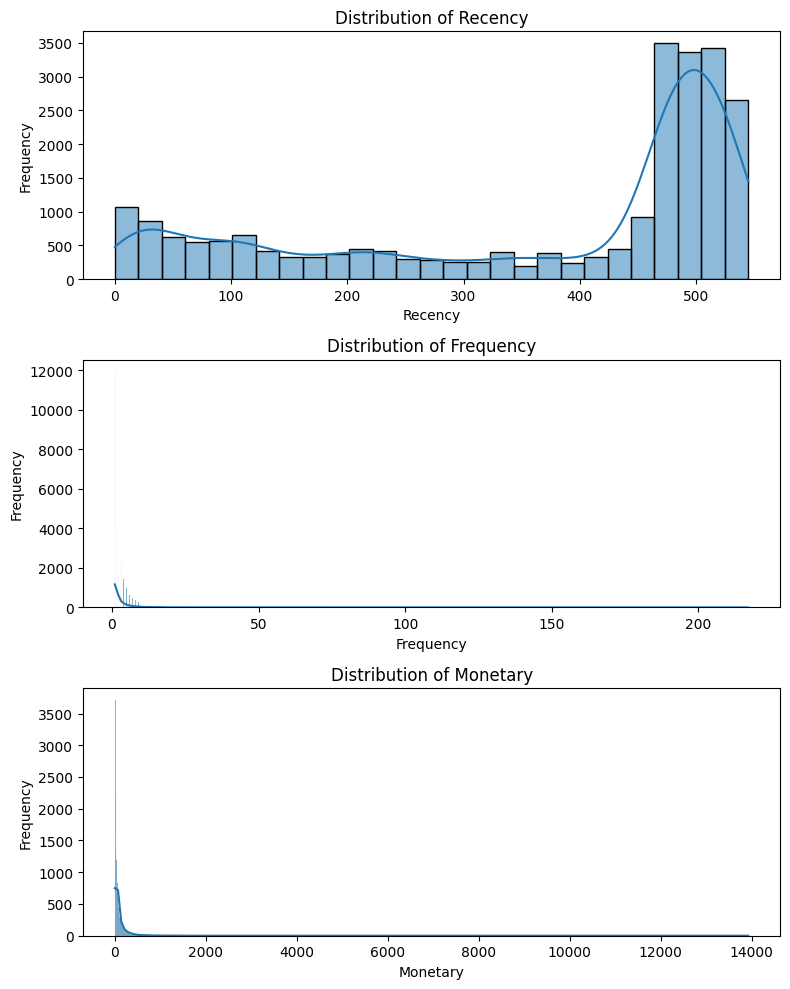

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualization

# Tạo một figure với kích thước (8, 10) để chứa các subplots
plt.figure(figsize=(8, 10))

# Vẽ biểu đồ phân phối của Recency (subplot 1)
plt.subplot(3, 1, 1)
sns.histplot(data=df_RFM, x='Recency', kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối của Frequency (subplot 2)
plt.subplot(3, 1, 2)
sns.histplot(data=df_RFM, x='Frequency', kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Vẽ biểu đồ phân phối của Monetary (subplot 3)
plt.subplot(3, 1, 3)
sns.histplot(data=df_RFM, x='Monetary', kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

# Tăng kích thước biểu đồ 2 và 3
plt.tight_layout()
plt.show()

**Recency: lệch trái**
*   Biểu đồ này có thể cho thấy sự phân bố của thời gian kể từ lần giao dịch gần nhất (Recency).
*   Từ khoảng giá trị từ 0 - 450, các giá trị phân phối rải rác khá đồng đều, không có sự biến động lớn.
*   Biểu đồ có đỉnh nổi bật ở khoảng giá trị từ 450 - 550, điều này có thể chỉ ra rằng có một số nhóm người dùng có thời gian kể từ lần giao dịch gần nhất tương tự nhau.
*   => Cần thu hút lượng khách này quay trở lại

**Frequency: lệch phải**
*   Biểu đồ này thể hiện sự phân phối của tần suất giao dịch (Frequency) của các người dùng.
*   Biểu đồ có thể sẽ có đỉnh nổi bật ở gần mức thấp và giảm dần theo tần suất giao dịch của các người dùng.

**Monetary: lệch phải**
*   Biểu đồ này thể hiện phân bố của giá trị đơn hàng (Monetary) của các người dùng.
*   Biểu đồ cũng cho thấy có sự biến động của giá trị đơn hàng giữa các người dùng. Tần xuất cao trong khoảng nhỏ hơn 1000

#### Calculate RFM quartiles

In [ ]:
# R đánh ngược lại vì số ngày tính từ lần cuối mua hàng, càng lớn nhãn càng nhỏ
# Create labels for R,F,M
r_labels = range(4,0,-1) # Số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1,5)
m_labels = range(1,5)

In [ ]:
[*r_labels]

[4, 3, 2, 1]

In [ ]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first')   , q=4, labels=r_labels)
f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first') , q=4, labels=f_labels)
m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first')  , q=4, labels=m_labels)

In [ ]:
# Create new columns R, F, M
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
7592,1,200,13925.98,4,4,4
14048,0,217,8976.33,4,4,4
7983,5,148,6960.08,4,4,4
19339,445,56,6552.70,3,4,4
7931,17,62,6497.18,4,4,4


In [ ]:
# Ví dụ: R = 4, khách hàng mới,
# R = 4, F = 4, khách hàng thường xuyên

In [ ]:
# Có bao nhiêu giá trị RFM có giá trị duy nhất có phải 64 giá trị duy nhất hay không?

#### Concat RFM quartile values to create RFM Segments

In [ ]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M'])) # Chuyển sang
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
user_id,,,,,,,
7592,1,200,13925.98,4,4,4,444
14048,0,217,8976.33,4,4,4,444
7983,5,148,6960.08,4,4,4,444
19339,445,56,6552.70,3,4,4,344
7931,17,62,6497.18,4,4,4,444


In [ ]:
# Tổng cộng có  cụm (thay vì tối đa 64 cụm) - nhưng quản lý 64 cụm thì rất nhiều nên cần giảm lại R,F,

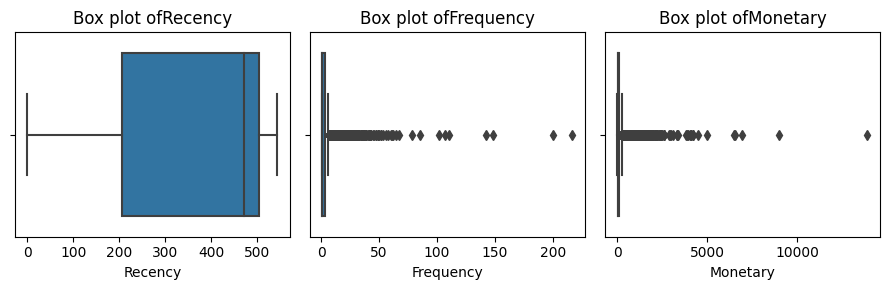

In [ ]:
fig, axs = plt.subplots(ncols = 3, figsize = (9,3))

for i, column in enumerate(['Recency','Frequency','Monetary']):
  sns.boxplot(x=df_RFM[column], ax = axs[i])
  axs[i].set_title('Box plot of' + column)

plt.tight_layout()
plt.show()

*  Recency: không có outliers
*  Frequency, Monetary: có outlier

#### Count num of unique segments

In [ ]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [ ]:
print(rfm_count_unique.sum())

44


- Having xx different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

#### Calculate RFM score and level

In [ ]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
user_id,,,,,,,,
7592,1,200,13925.98,4,4,4,444,12
14048,0,217,8976.33,4,4,4,444,12
7983,5,148,6960.08,4,4,4,444,12
19339,445,56,6552.70,3,4,4,344,11
7931,17,62,6497.18,4,4,4,444,12


#### Manual Segmentation

In [ ]:
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Best Customers'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 10)):
        return 'Loyal Customers'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Promising Customers'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Need attention'
    else:
        return 'Get better deals for them'

# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
user_id,,,,,,,,,
7592,1,200,13925.98,4,4,4,444,12,Best Customers
14048,0,217,8976.33,4,4,4,444,12,Best Customers
7983,5,148,6960.08,4,4,4,444,12,Best Customers
19339,445,56,6552.70,3,4,4,344,11,Best Customers
7931,17,62,6497.18,4,4,4,444,12,Best Customers


In [ ]:
# Print the header with top 5 rows
df_RFM[::2000]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
user_id,,,,,,,,,
7592,1,200,13925.98,4,4,4,444,12,Best Customers
16760,401,2,273.65,3,3,4,334,10,Best Customers
22035,90,2,156.35,4,3,4,434,11,Best Customers
7822,230,7,104.04,3,4,3,343,10,Best Customers
7964,483,2,74.22,2,3,3,233,8,Loyal Customers
13009,499,1,55.76,2,1,3,213,6,Promising Customers
4076,523,1,42.41,1,1,2,112,4,Get better deals for them
16496,487,1,31.96,2,1,2,212,5,Need attention
22270,467,1,26.14,3,1,2,312,6,Promising Customers


#### Number of segments

In [ ]:
df_RFM['RFM_Level'].value_counts()

Best Customers               7594
Need attention               5104
Get better deals for them    4276
Loyal Customers              3399
Promising Customers          3197
Name: RFM_Level, dtype: int64

Best Customers: Có tổng cộng 7594 khách hàng. Đây có vẻ là nhóm quan trọng nhất vì số lượng khách hàng trong nhóm này là cao nhất.

=> Nhóm khách hàng này đóng góp một lượng lớn doanh thu hoặc có giá trị chi tiêu cao. Cần duy trì và tăng cường dịch vụ, ưu đãi để giữ chân nhóm này.


Promising Customers: Có tổng cộng 3197 khách hàng. Đây có thể là nhóm mới hoặc những khách hàng mới tiềm năng.

=> Cần xem xét cách tiếp cận để biến họ thành khách hàng thường xuyên và trung thành hơn.

Loyal Customers: Có tổng cộng 3399 khách hàng. Nhóm này có khả năng đã mua sắm thường xuyên và có mức độ trung thành với thương hiệu của bạn.

=> Cần tiếp tục duy trì sự hài lòng của họ và cung cấp các ưu đãi đặc biệt để thể hiện sự trân trọng.

Need Attention: Có tổng cộng 5104 khách hàng. Số lượng khách hàng cần sự chú ý và quản lý tốt hơn.

=> Khách hàng chưa thể thường xuyên mua sắm hoặc có những vấn đề về hài lòng với dịch vụ. Cần phải tìm hiểu thêm để xác định nguyên nhân và đưa ra các biện pháp cải thiện.

Get Better Deals for Them: Có tổng cộng 4276 khách hàng. Nhóm này có thể là những khách hàng tiềm năng, có khả năng mua sắm thường xuyên hơn nếu được đưa ra các ưu đãi tốt hơn.

=> Cần xác định chiến lược ưu đãi hấp dẫn để kích thích mua sắm của họ.

#### Calculate mean values for each segment

In [ ]:
# Để ý nhóm không có giá trị: "NEW"

In [ ]:
# Để biết đặc điểm mỗi nhóm, dựa vào giá trị trung bình

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)
rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)
# Reset the index
rfm_agg = rfm_agg.reset_index()
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Best Customers,149.0,6.0,251.0,7594,32.22
1,Get better deals for them,524.0,1.0,20.0,4276,18.14
2,Loyal Customers,358.0,2.0,61.0,3399,14.42
3,Need attention,496.0,1.0,28.0,5104,21.65
4,Promising Customers,482.0,1.0,48.0,3197,13.56


*  Best Customers (32.22%): Mua thường xuyên, tần suất cao, chi tiêu lớn.
*  Loyal Customers (14.42%): Mua đều đặn, tiềm năng duy trì doanh thu.
*  Promising Customers (13.56%): Mới, tiềm năng phát triển.
*  Need Attention (21.65%): Cần cải thiện tần suất mua và hài lòng.
*  Get Better Deals for Them (18.14%): Cần ưu đãi để tăng tần suất mua.


#### TreeMap

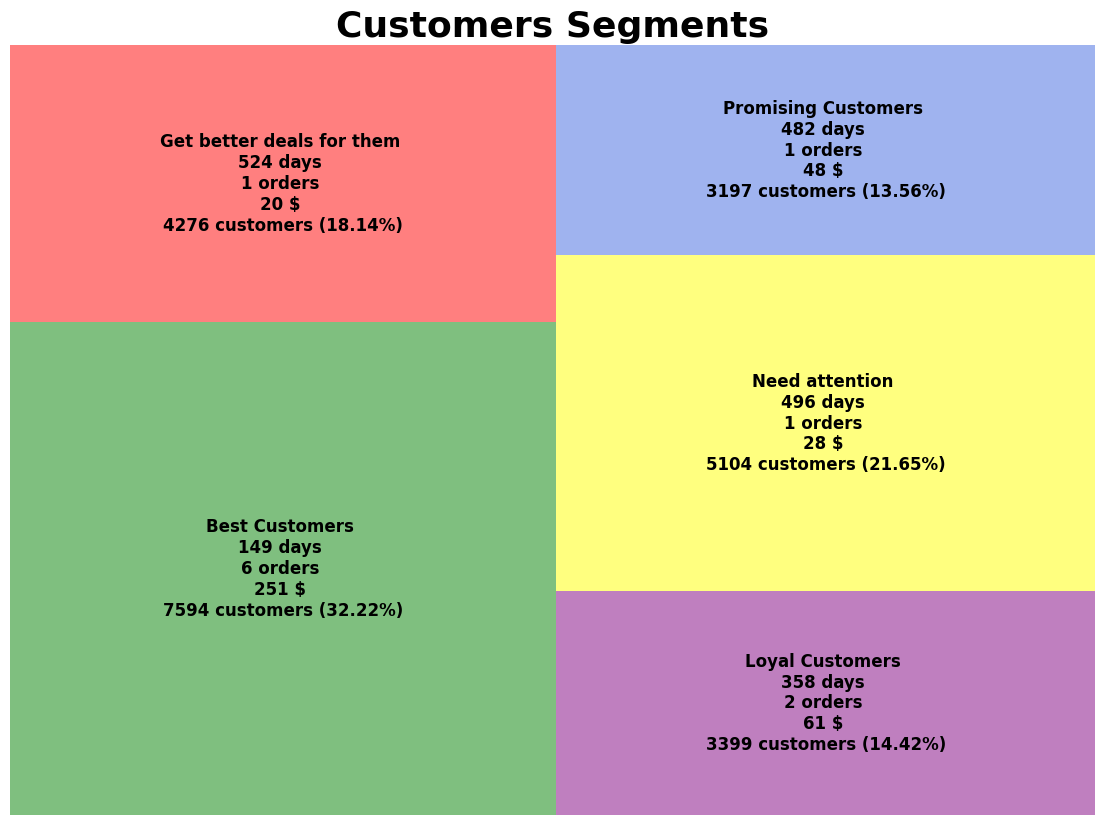

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
               'Best Customers':'green',
               'Get Better Deals for Them':'red' ,
               'Loyal Customers':'purple',
               'Need attention':'yellow',
               'Promising Customers ':'royalblue'
               }

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

#### 3d Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

- New Subscribers: These are identifiable customers who very recently joined your email marketing list, but haven’t purchased yet.
- Window Shoppers: These are identifiable customers who have never purchased but are spending time browsing product detail pages.
- Hot Prospects: These are potential customers with the highest levels of purchase intent. They are adding to cart, potentially abandoning transactions, and appear to be ready to buy.
- Champions: There are your most loyal customers. They are your big spenders, purchase the most frequently, and have very high recency.
- Regulars These are great customers who purchase regularly and frequently. They are on their way to becoming Champions.
- Potential Regulars: These are customers who have purchased recently, more than once, and are on their way to becoming better customers.
- New Customers: These are new customers who have purchased recently, but only once.
- Promising: These are also new customers who have purchased recently but spent a little bit more or more than once in a short period of time.
- Cooling Down: These customers were once Regulars or Champions, but have decelerated their purchasing activity. This group needs attention.
- At Risk: These are customers with above average recency, frequency, and monetary characteristics but are well past the point of abnormal purchase recency. You don’t have much time left to re-engage these folks.
- Highly at Risk: These are formerly high-value customers who are in the final stage of defection. If we don’t market to them now, it’s likely that we’ll lose these customers forever.
- Lost/Ignore: These are customers with low frequency, low recency and low monetary scores. Don’t invest marketing resources or attention here.

In [ ]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
user_id,,,,,,,,,
7592,1,200,13925.98,4,4,4,444,12,Best Customers
14048,0,217,8976.33,4,4,4,444,12,Best Customers
7983,5,148,6960.08,4,4,4,444,12,Best Customers
19339,445,56,6552.70,3,4,4,344,11,Best Customers
7931,17,62,6497.18,4,4,4,444,12,Best Customers


#### Others plot

In [ ]:
import plotly.express as px

colors = ['red', 'yellow','blue', 'pink', 'green']
fig = px.pie(rfm_agg, values='RecencyMean', names='RFM_Level', title='RecencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','red', 'yellow','blue']
fig = px.pie(rfm_agg, values='FrequencyMean', names='RFM_Level', title='FrequencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','blue', 'yellow','red']
fig = px.pie(rfm_agg, values='MonetaryMean', names='RFM_Level', title='MonetaryMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


### 1. RFM + Kmeans (LDS6)

In [ ]:
df_now = df_RFM[['Recency','Frequency','Monetary']]
df_now

,Recency,Frequency,Monetary
user_id,,,
7592,1,200,13925.98
14048,0,217,8976.33
7983,5,148,6960.08
19339,445,56,6552.70
7931,17,62,6497.18
...,...,...,...
2556,535,1,0.00
15452,491,1,0.00
11270,505,1,0.00


In [ ]:
df_now.head()

,Recency,Frequency,Monetary
user_id,,,
7592,1,200,13925.98
14048,0,217,8976.33
7983,5,148,6960.08
19339,445,56,6552.70
7931,17,62,6497.18


#### Scale Data: Apply Robust Scaler

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper

# Dữ liệu lệch phải và có outliners
scaler = SklearnTransformerWrapper(RobustScaler())
# Fit và biến đổ dữ liêu
scaled_data = scaler.fit_transform(df_now[['Recency','Frequency','Monetary']])
scaled_data

,Recency,Frequency,Monetary
user_id,,,
7592,-1.577181,99.5,160.720500
14048,-1.580537,108.0,103.417962
7983,-1.563758,73.5,80.075656
19339,-0.087248,27.5,75.359382
7931,-1.523490,30.5,74.716622
...,...,...,...
2556,0.214765,0.0,-0.501809
15452,0.067114,0.0,-0.501809
11270,0.114094,0.0,-0.501809


In [ ]:
!pip install multiprocess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00


In [ ]:
# Config
import multiprocess as mp
from itertools import repeat
from datetime import datetime

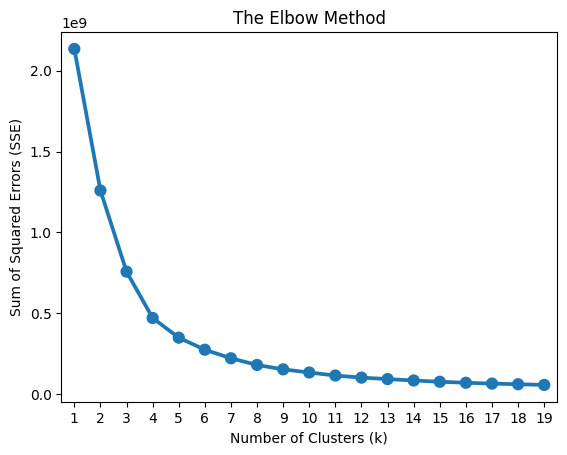

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# X assume là dữ liệu bạn đang sử dụng cho việc phân cụm
# df_now = ... (biến này chứa dữ liệu của bạn)

sse = {}  # Dictionary để lưu giá trị SSE cho từng số lượng cụm k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Sử dụng n_init=10 mặc định
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_  # Sum of squared distances to closest cluster centroid

# Vẽ biểu đồ để xác định số lượng cụm tối ưu bằng phương pháp Elbow
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()



In [ ]:
# Assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_now)
df_RFM2 = df_now
df_RFM2['Cluster_Label'] = kmeans.labels_
df_RFM2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-73-f1e430ee6139>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary,Cluster_Label
user_id,,,,
7592,1,200,13925.98,2
14048,0,217,8976.33,2
7983,5,148,6960.08,2
19339,445,56,6552.70,2
7931,17,62,6497.18,2


In [ ]:
cluster_labels1 = kmeans.fit_predict(df_now)
cluster_labels1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Để biết đặc điểm mỗi nhóm, dựa vào giá trị trung bình

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_RFM2.groupby('Cluster_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)
# Reset the index
rfm_agg2 = rfm_agg2.reset_index()
rfm_agg2

,Cluster_Label,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,0,481.3,1.4,42.5,16146,68.50
1,1,120.8,5.7,200.4,7224,30.65
2,2,59.5,28.0,1807.7,200,0.85


Cluster 0 - "Need attention":
Recency trung bình khá cao, thời gian mua sắm gần đây cao.
Frequency trung bình thấp, cho thấy khác hàng mua sắm không thường xuyên.
Monetary trung bình thấp, cho thấy họ có xu hướng chi tiêu thấp.
Đây là nhóm có số lượng khách hàng lớn nhất, tuy nhiên, họ thường mua sắm ít và chi tiêu thấp.

Cluster 1 - "Promising Customers":
Recency trung bình thấp, cho thấy những khách hàng trong nhóm này đã mua sắm gần đây.
Frequency trung bình cao, họ mua sắm thường xuyên.
Monetary trung bình cao, họ có xu hướng chi tiêu cao.
Đây là một nhóm có số lượng khách hàng khá nhiều, có xu hướng mua sắm thường xuyên và chi tiêu cao.

Cluster 2 - "Best Customers":
Recency trung bình rất thấp, cho thấy những khách hàng trong nhóm này đã mua sắm gần đây nhất.
Frequency trung bình rất cao, đề xuất rằng họ mua sắm thường xuyên và đều đặn.
Monetary trung bình rất cao, cho thấy họ có xu hướng chi tiêu lớn.
Đây là một nhóm có số lượng khách hàng ít nhất, nhưng chất lượng và giá trị của họ đối với doanh nghiệp rất cao.



#### TreeMap

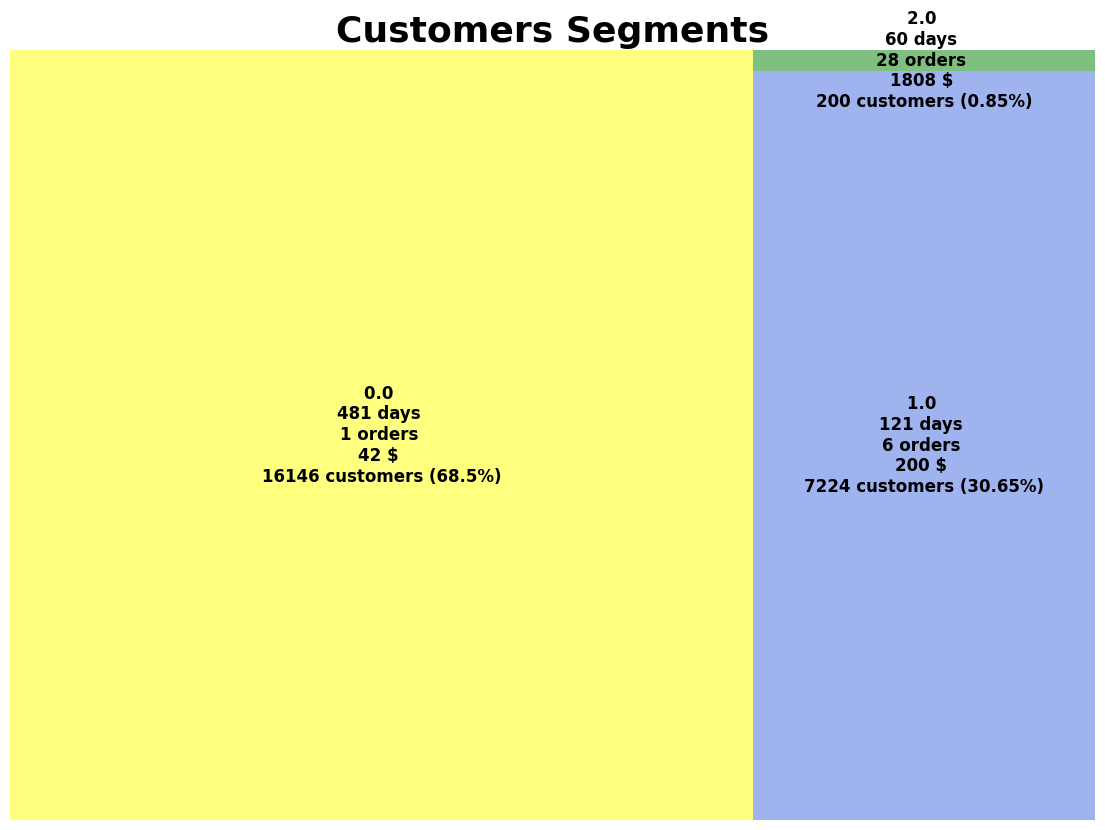

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
               'Need attention':'yellow',
               'Promising Customers':'royalblue',
               'Best Customers':'green'
               }

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster_Label",
           hover_name="Cluster_Label", size_max=100)
fig.show()

#### 3d Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_RFM2, x='Recency', y='Frequency', z='Monetary',
                    color = 'Cluster_Label', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

#### Others plot

In [ ]:
import plotly.express as px

colors = ['red', 'pink','green']
fig = px.pie(rfm_agg2, values='RecencyMean', names='Cluster_Label', title='RecencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0.1, 0, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','red']
fig = px.pie(rfm_agg2, values='FrequencyMean', names='Cluster_Label', title='FrequencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0.2, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','blue','pink']
fig = px.pie(rfm_agg2, values='MonetaryMean', names='Cluster_Label', title='MonetaryMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0.1, 0, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
df_RFM2 = pd.DataFrame(df_RFM2, columns=['Recency', 'Frequency', 'Monetary'])
df_RFM2['ID'] = df_RFM2.index
df_RFM2['Cluster_Label'] = kmeans.labels_
df_RFM2.head()

,Recency,Frequency,Monetary,ID,Cluster_Label
user_id,,,,,
7592,1,200,13925.98,7592,2
14048,0,217,8976.33,14048,2
7983,5,148,6960.08,7983,2
19339,445,56,6552.70,19339,2
7931,17,62,6497.18,7931,2


In [ ]:
rfm = pd.melt(df_RFM2.reset_index(),
                      id_vars=['ID', 'Cluster_Label'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm.head()

,ID,Cluster_Label,Attribute,Value
0,7592,2,Recency,1.0
1,14048,2,Recency,0.0
2,7983,2,Recency,5.0
3,19339,2,Recency,445.0
4,7931,2,Recency,17.0


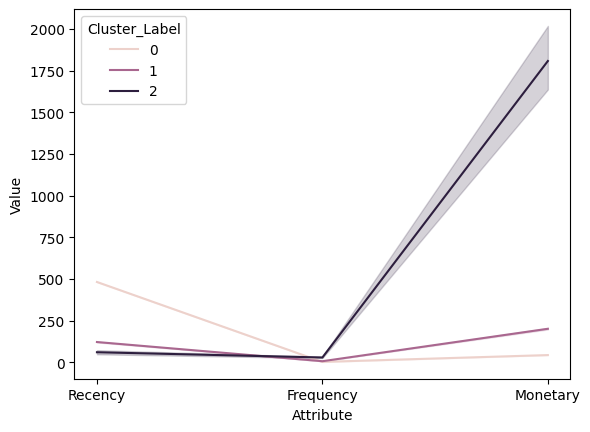

In [ ]:
# Vẽ đường dẫn (line plot) cho 'Attribute' và 'Value', sử dụng 'Cluster_Label' để đánh dấu màu sắc
sns.lineplot(x='Attribute', y='Value', hue='Cluster_Label', data=rfm)

# Hiển thị biểu đồ
plt.show()

Cluster 0: "Low Activity" thường mua sắm ít và chi tiêu thấp, có thể cần chiến lược để kích thích mua sắm thường xuyên hơn.

Cluster 1: "Regular" mua sắm thường xuyên và có chi tiêu cao, có thể cần duy trì mối quan hệ và cung cấp ưu đãi để thúc đẩy mua sắm thêm.

Cluster 2: "High-Value" là nhóm quan trọng và có giá trị cao nhất, cần được duy trì và thúc đẩy mua sắm thường xuyên hơn.

### 2.   RFM + Hierarchical Clustering (LDS6)


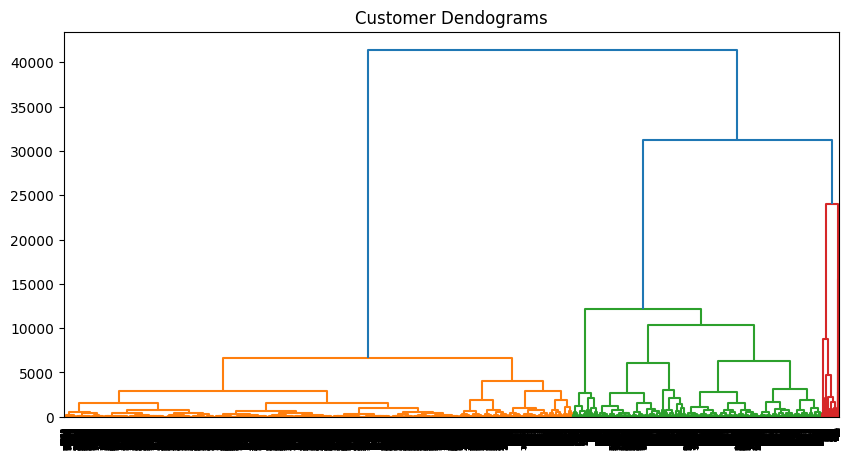

In [ ]:
from scipy.cluster import hierarchy

plt.figure(figsize=(10,5))
plt.title('Customer Dendograms')
dend = hierarchy.dendrogram(hierarchy.linkage(df_now, method= 'ward'))

In [ ]:
# mergings = linkage(df_now, method = "ward", metric='euclidean')
# dendrogram(mergings)
# plt.show()

Theo sơ đồ dendrogram ta xác định được 3 cụm tối ưu

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Áp dụng Hierarchical Clustering với số cụm là 3
num_clusters = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=num_clusters)
df_now3 = df_now
df_RFM3 = df_now3
df_RFM3['Cluster_Label'] = hierarchical_cluster.fit_predict(df_now3)
df_RFM3

<ipython-input-87-26120a763663>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary,Cluster_Label
user_id,,,,
7592,1,200,13925.98,0
14048,0,217,8976.33,0
7983,5,148,6960.08,0
19339,445,56,6552.70,0
7931,17,62,6497.18,0
...,...,...,...,...
2556,535,1,0.00,1
15452,491,1,0.00,1
11270,505,1,0.00,1


In [ ]:
cluster_labels2 = hierarchical_cluster.fit_predict(df_now)
cluster_labels2

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df_now3['Cluster_Label'].value_counts()

1    15493
2     7579
0      498
Name: Cluster_Label, dtype: int64

In [ ]:
# Để biết đặc điểm mỗi nhóm, dựa vào giá trị trung bình

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg3 = df_RFM3.groupby('Cluster_Label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
rfm_agg3.columns = rfm_agg3.columns.droplevel()
rfm_agg3.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg3['Percent'] = round((rfm_agg3['Count']/rfm_agg3.Count.sum())*100, 2)
# Reset the index
rfm_agg3 = rfm_agg3.reset_index()
rfm_agg3

,Cluster_Label,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,0,64.9,19.9,1187.5,498,2.11
1,1,488.0,1.3,40.0,15493,65.73
2,2,140.2,5.1,169.5,7579,32.16


Best Customers:
Cụm 0 chứa "Best Customers" với Recency thấp, Frequency và Monetary cao. Các khách hàng trong cụm này là những người mua hàng gần đây, thường xuyên và chi tiêu lớn.

Get Better Deals for Them:
Cụm 1 chứa các khách hàng cần "Get Better Deals" với Recency cao và Frequency, Monetary thấp. Đây là những người đã lâu không mua hàng và chi tiêu thấp.

Loyal Customers:
Cụm 2 bao gồm các "Loyal Customers" với các giá trị Recency, Frequency và Monetary ở mức trung bình. Đây có thể là những người đã lâu không mua hàng, nhưng họ thường xuyên và có chi tiêu trung bình.

#### TreeMap

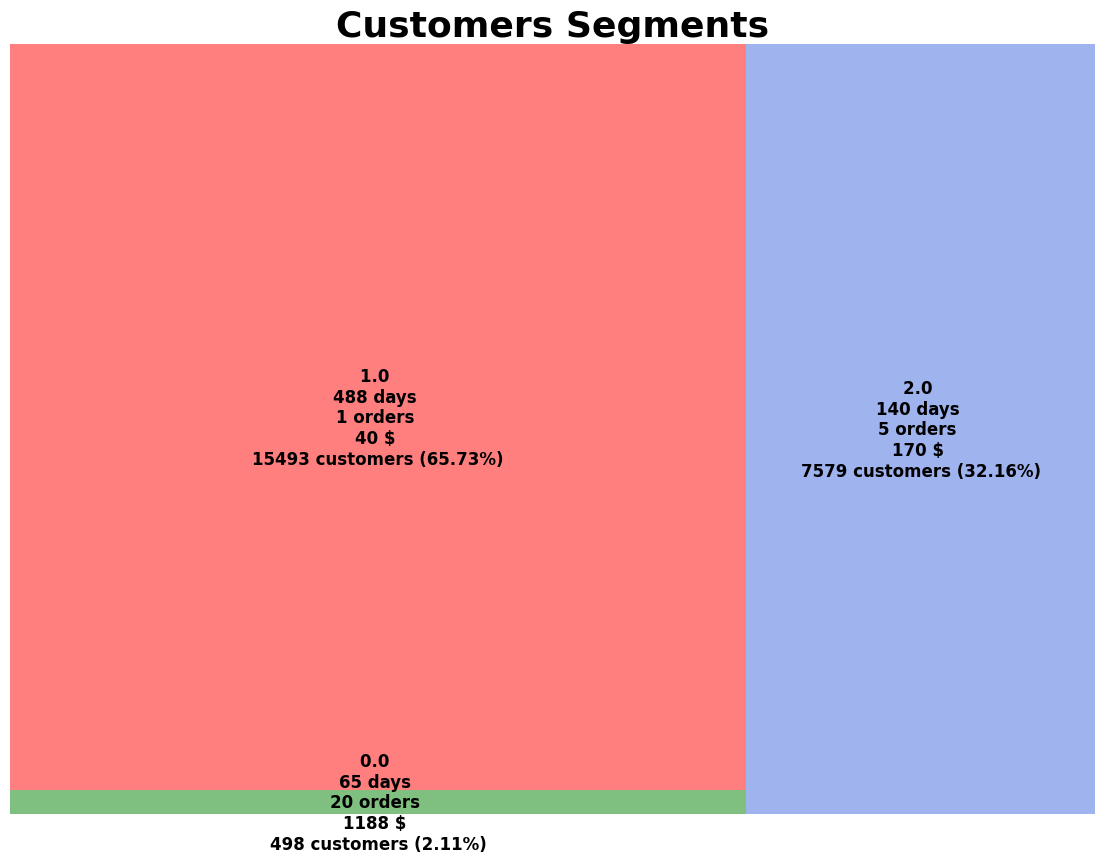

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
               'Best Customers':'green',
               'Get Better Deals for Them':'red',
               'Loyal Customers':'royalblue',
               }

squarify.plot(sizes=rfm_agg3['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg3.iloc[i])
                      for i in range(0, len(rfm_agg3))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg3, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster_Label",
           hover_name="Cluster_Label", size_max=100)
fig.show()

#### 3d Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_RFM3, x='Recency', y='Frequency', z='Monetary',
                    color = 'Cluster_Label', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

#### Others plot

In [ ]:
import plotly.express as px

colors = ['red', 'pink','green']
fig = px.pie(rfm_agg3, values='RecencyMean', names='Cluster_Label', title='RecencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','red']
fig = px.pie(rfm_agg3, values='FrequencyMean', names='Cluster_Label', title='FrequencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','red']
fig = px.pie(rfm_agg3, values='MonetaryMean', names='Cluster_Label', title='MonetaryMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
df_RFM3 = pd.DataFrame(df_RFM3, columns=['Recency', 'Frequency', 'Monetary'])
df_RFM3['ID'] = df_RFM3.index
df_RFM3['Cluster_Label'] = hierarchical_cluster.labels_
df_RFM3.head()

,Recency,Frequency,Monetary,ID,Cluster_Label
user_id,,,,,
7592,1,200,13925.98,7592,0
14048,0,217,8976.33,14048,0
7983,5,148,6960.08,7983,0
19339,445,56,6552.70,19339,0
7931,17,62,6497.18,7931,0


In [ ]:
rfm = pd.melt(df_RFM3.reset_index(),
                      id_vars=['ID', 'Cluster_Label'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm.head()

,ID,Cluster_Label,Attribute,Value
0,7592,0,Recency,1.0
1,14048,0,Recency,0.0
2,7983,0,Recency,5.0
3,19339,0,Recency,445.0
4,7931,0,Recency,17.0


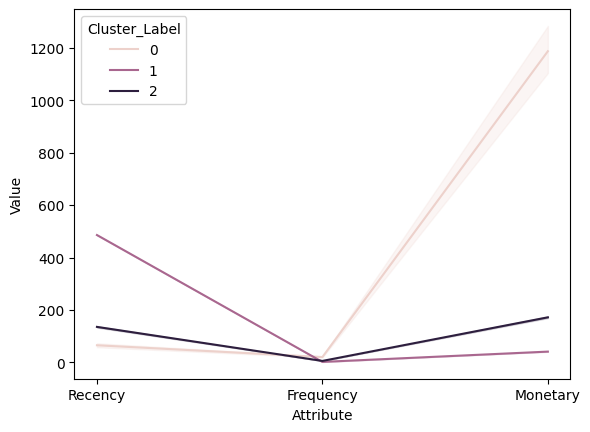

In [ ]:
# Vẽ đường dẫn (line plot) cho 'Attribute' và 'Value', sử dụng 'Cluster_Label' để đánh dấu màu sắc
sns.lineplot(x='Attribute', y='Value', hue='Cluster_Label', data=rfm)

# Hiển thị biểu đồ
plt.show()

Cluster 0: R thấp, F và M cao. Đây là nhóm "Best Customers" - những khách hàng quan trọng và có giá trị cao.

Cluster 1: R cao, F và M thấp. Nhóm "Get Better Deals for Them"
Cần thực hiện chiến lược để kích thích mua sắm thường xuyên hơn cho nhóm này.

Cluster 2: R, F, và M trung bình. Đây là nhóm "Loyal Customers" và có tiềm năng phát triển

In [ ]:
# Note: Có thể thử nghiệm thêm các cách phân cụm khác và đánh giá kết quả

### 3.   RFM + Kmeans (LDS9)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

In [ ]:
selected_columns = ['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score']
df_RFM = df_RFM.loc[:, selected_columns]
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
user_id,,,,,,,,
7592,1,200,13925.98,4,4,4,444,12
14048,0,217,8976.33,4,4,4,444,12
7983,5,148,6960.08,4,4,4,444,12
19339,445,56,6552.70,3,4,4,344,11
7931,17,62,6497.18,4,4,4,444,12


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_RFM[['Recency', 'Frequency', 'Monetary']])
data_scaled

array([[0.00183486, 0.9212963 , 1.        ],
       [0.        , 1.        , 0.64457439],
       [0.00917431, 0.68055556, 0.49979104],
       ...,
       [0.9266055 , 0.        , 0.        ],
       [0.99633028, 0.        , 0.        ],
       [0.97247706, 0.        , 0.        ]])

In [ ]:
input_dimension = data_scaled.shape[1]

In [ ]:
# Define, Compile, and Train the Autoencoder:

input_layer = Input(shape=(input_dimension,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dimension, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
93/93 [==============================] - 2s 6ms/step - loss: 0.0518
Epoch 2/50
93/93 [==============================] - 1s 6ms/step - loss: 6.2593e-04
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 5.1751e-04
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 4.7007e-04
Epoch 5/50
93/93 [==============================] - 0s 4ms/step - loss: 4.1099e-04
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 3.3973e-04
Epoch 7/50
93/93 [==============================] - 0s 4ms/step - loss: 2.1641e-04
Epoch 8/50
93/93 [==============================] - 0s 4ms/step - loss: 1.3107e-04
Epoch 9/50
93/93 [==============================] - 0s 4ms/step - loss: 1.0667e-04
Epoch 10/50
93/93 [==============================] - 0s 4ms/step - loss: 8.9455e-05
Epoch 11/50
93/93 [==============================] - 0s 4ms/step - loss: 7.5836e-05
Epoch 12/50
93/93 [==============================] - 0s 4ms/step - loss: 6.5682e-05
Epoch

In [ ]:
encoder = Model(input_layer, encoded)
compressed_data = encoder.predict(data_scaled)

737/737 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

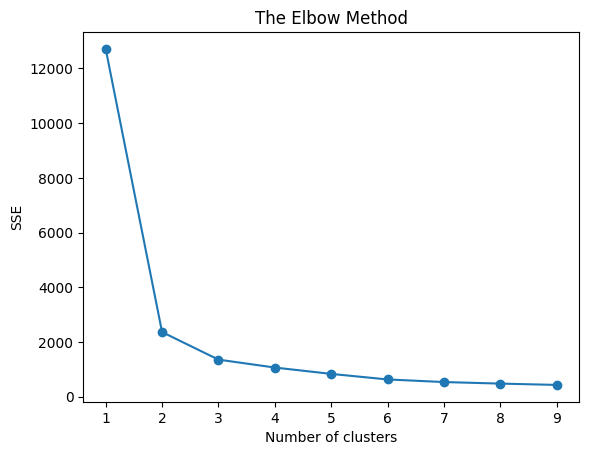

In [ ]:
#SSE
sse = {}
for k in range(1, 10):  # ví dụ từ 1 đến 10 cụm
    kmeans_deep = KMeans(n_clusters=k, random_state=42).fit(compressed_data)
    sse[k] = kmeans_deep.inertia_

#Elbow method
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

In [ ]:
# Chọn số Cluster là 3

In [ ]:
kmeans_deep = KMeans(n_clusters=3, random_state=0).fit(compressed_data)
df_RFM['Cluster'] = kmeans_deep.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Model 3: kmeans_deep
cluster_labels3 = kmeans_deep.fit_predict(df_now)
# kmeans_deep = cluster_labels3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



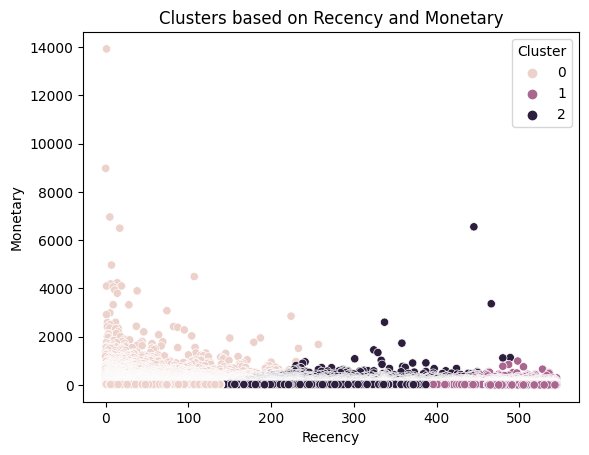

In [ ]:
# Scatter Plot for RFM values:

import seaborn as sns

sns.scatterplot(data=df_RFM, x='Recency', y='Monetary', hue='Cluster')
plt.title('Clusters based on Recency and Monetary')
plt.show()

In [ ]:
# 3D Scatter Plot for RFM values:
import plotly.express as px

fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', opacity=0.5)
fig.update_traces(marker=dict(size=5),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
# Calculate average values for each Cluster, and return a size of each segment
cluster_agg = df_RFM.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

cluster_agg.columns = cluster_agg.columns.droplevel()
cluster_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
cluster_agg['Percent'] = round((cluster_agg['Count']/cluster_agg.Count.sum())*100, 2)

# Reset the index for better visualization
cluster_agg = cluster_agg.reset_index()

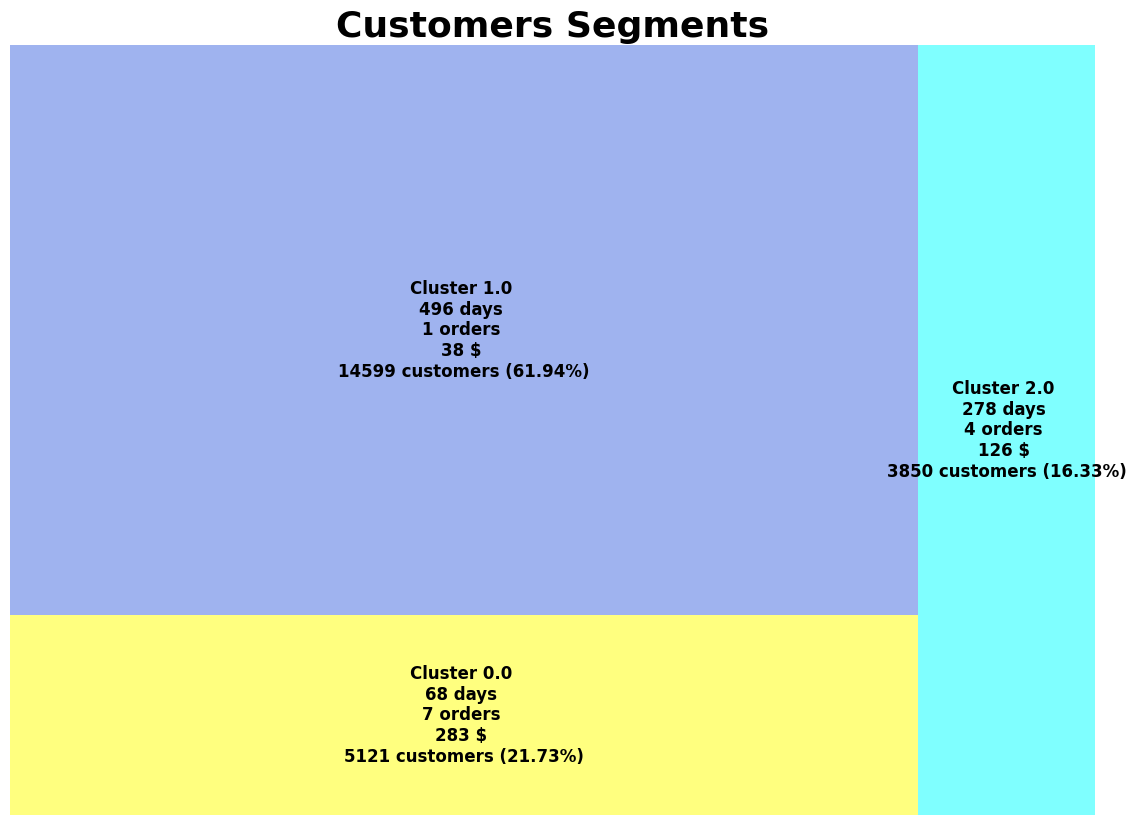

In [ ]:
# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors = ['yellow','royalblue', 'cyan']

squarify.plot(sizes=cluster_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors,
              label=['Cluster {} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*cluster_agg.iloc[i])
                      for i in range(0, len(cluster_agg))], alpha=0.5 )

plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
cluster_agg.head()

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,0,68.0,7.0,283.0,5121,21.73
1,1,496.0,1.0,38.0,14599,61.94
2,2,278.0,4.0,126.0,3850,16.33


#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(cluster_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100)
fig.show()

### 4. PySpark

In [ ]:
!apt update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar -xvf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [980 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,241 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [860 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,136 kB]
Hit:13 https://ppa.launchpadcontent.net/g

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/gdrive/MyDrive/DataScience_MachineLearning/LDS0_k287_ONLINE_NguyenThanhTrong/Project1/spark-3.3.0-bin-hadoop3"  # Replace with your actual Spark path


In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark import SparkContext
SparkContext.setSystemProperty('spark.hadoop.dfs.client.use.datanode.hostname', 'true')
sc =SparkContext(master="local", appName="New Spark Context")

In [ ]:
import pyspark
from pyspark.sql import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


In [ ]:
spark = SparkSession.builder.appName('kMneas').getOrCreate()

In [ ]:
df_now_big = df_RFM[['Recency', 'Frequency', 'Monetary']]
df_now_big.head()

,Recency,Frequency,Monetary
user_id,,,
7592,1,200,13925.98
14048,0,217,8976.33
7983,5,148,6960.08
19339,445,56,6552.70
7931,17,62,6497.18


In [ ]:
spark_df = spark.createDataFrame(df_now_big)
spark_df.show()

/content/gdrive/MyDrive/DataScience_MachineLearning/LDS0_k287_ONLINE_NguyenThanhTrong/Project1/spark-3.3.0-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/content/gdrive/MyDrive/DataScience_MachineLearning/LDS0_k287_ONLINE_NguyenThanhTrong/Project1/spark-3.3.0-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



+-------+---------+------------------+
|Recency|Frequency|          Monetary|
+-------+---------+------------------+
|      1|      200|          13925.98|
|      0|      217|           8976.33|
|      5|      148|           6960.08|
|    445|       56|            6552.7|
|     17|       62|           6497.18|
|      7|       42|            4968.0|
|    107|       13|           4490.64|
|     14|       32|           4234.45|
|      6|       35|            4185.1|
|     19|       29|4100.2699999999995|
|      1|      110|           4097.91|
|      9|       85|            4063.3|
|     11|      142|           3933.94|
|     38|       50|            3898.7|
|     14|       60|           3798.24|
|    466|        7|           3363.93|
|      9|       49|           3324.49|
|     28|       23|           3319.83|
|     74|       49|           3077.45|
|      5|       27|            2982.8|
+-------+---------+------------------+
only showing top 20 rows



In [ ]:
spark_df.printSchema()

root
 |-- Recency: long (nullable = true)
 |-- Frequency: long (nullable = true)
 |-- Monetary: double (nullable = true)



In [ ]:
spark_df.describe().show()

+-------+------------------+------------------+------------------+
|summary|           Recency|         Frequency|          Monetary|
+-------+------------------+------------------+------------------+
|  count|             23570|             23570|             23570|
|   mean| 367.2216376750106|2.9445905812473483|105.89659524821847|
| stddev|181.21117706673368| 4.679292665629427|240.21466554799852|
|    min|                 0|                 1|               0.0|
|    max|               545|               217|          13925.98|
+-------+------------------+------------------+------------------+



In [ ]:
vec_assembler = VectorAssembler(inputCols=spark_df.columns,outputCol='features')

In [ ]:
final_data = vec_assembler.transform(spark_df)


In [ ]:
final_data.show()

+-------+---------+------------------+--------------------+
|Recency|Frequency|          Monetary|            features|
+-------+---------+------------------+--------------------+
|      1|      200|          13925.98|[1.0,200.0,13925.98]|
|      0|      217|           8976.33| [0.0,217.0,8976.33]|
|      5|      148|           6960.08| [5.0,148.0,6960.08]|
|    445|       56|            6552.7| [445.0,56.0,6552.7]|
|     17|       62|           6497.18| [17.0,62.0,6497.18]|
|      7|       42|            4968.0|   [7.0,42.0,4968.0]|
|    107|       13|           4490.64|[107.0,13.0,4490.64]|
|     14|       32|           4234.45| [14.0,32.0,4234.45]|
|      6|       35|            4185.1|   [6.0,35.0,4185.1]|
|     19|       29|4100.2699999999995|[19.0,29.0,4100.2...|
|      1|      110|           4097.91| [1.0,110.0,4097.91]|
|      9|       85|            4063.3|   [9.0,85.0,4063.3]|
|     11|      142|           3933.94|[11.0,142.0,3933.94]|
|     38|       50|            3898.7|  

In [ ]:
k_list = []
silhouette_list = []
sil_str = ''

for k in range(2, 11):
    kmeans = KMeans(featuresCol='features', k=k)
    model = kmeans.fit(final_data)
    k_list.append(k)

    # silhouette
    predictions = model.transform(final_data)

    # Evaluate clustering by computing silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_list.append(silhouette)

    sil_str = sil_str + 'with k= ' + str(k) + '- silhouette = ' + str(silhouette) + '\n'

print(sil_str)


with k= 2- silhouette = 0.6470291968432295
with k= 3- silhouette = 0.784195018444504
with k= 4- silhouette = 0.8333110848535601
with k= 5- silhouette = 0.8347777238092401
with k= 6- silhouette = 0.8397756598749841
with k= 7- silhouette = 0.7609646321341633
with k= 8- silhouette = 0.6884782833470391
with k= 9- silhouette = 0.6910043364803166
with k= 10- silhouette = 0.692675312104846



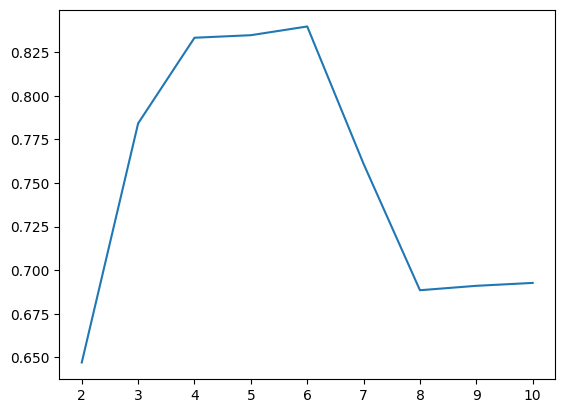

In [ ]:
plt.plot(k_list, silhouette_list)
plt.show()

In [ ]:
# Chon k = 4

In [ ]:
kmeans_spark = KMeans(featuresCol = 'features', k = 4)
model_4 = kmeans_spark.fit(final_data)

In [ ]:
predictions = model_4.transform(final_data)
evaluator = ClusteringEvaluator()
silhoutte = evaluator.evaluate(predictions)
print('silhoutte = '+str(silhoutte))
silhouette_score4 = silhoutte

silhoutte = 0.8333110848535601


In [ ]:
# Show the result
centers = model.clusterCenters()
print('Cluster centers:')
for center in centers:
  print(center)

Cluster centers:
[ 75.87116564  14.17177914 751.10339468]
[422.77563375   2.40257283  87.41595157]
[ 72.44734982   9.04452297 344.65371731]
[  93.6    136.6   8582.454]
[  50.66393443   25.31147541 1561.87844262]
[501.48738245   1.1080721   28.30728997]
[  69.2      44.25   3569.0125]
[236.27238176   3.24577703  87.65456081]
[ 70.88910134   4.42001275 113.87608668]
[343.35901639   4.87704918 293.46877049]


In [ ]:
predictions =model_4.transform(final_data)

In [ ]:
predictions.show(5)

+-------+---------+--------+--------------------+----------+
|Recency|Frequency|Monetary|            features|prediction|
+-------+---------+--------+--------------------+----------+
|      1|      200|13925.98|[1.0,200.0,13925.98]|         2|
|      0|      217| 8976.33| [0.0,217.0,8976.33]|         2|
|      5|      148| 6960.08| [5.0,148.0,6960.08]|         2|
|    445|       56|  6552.7| [445.0,56.0,6552.7]|         2|
|     17|       62| 6497.18| [17.0,62.0,6497.18]|         2|
+-------+---------+--------+--------------------+----------+
only showing top 5 rows



In [ ]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 6935|
|         3|  613|
|         2|   19|
|         0|16003|
+----------+-----+



In [ ]:
df_new_big = predictions.toPandas()
df_new_big

,Recency,Frequency,Monetary,features,prediction
0,1,200,13925.98,"[1.0, 200.0, 13925.98]",2
1,0,217,8976.33,"[0.0, 217.0, 8976.33]",2
2,5,148,6960.08,"[5.0, 148.0, 6960.08]",2
3,445,56,6552.70,"[445.0, 56.0, 6552.7]",2
4,17,62,6497.18,"[17.0, 62.0, 6497.18]",2
...,...,...,...,...,...
23565,535,1,0.00,"[535.0, 1.0, 0.0]",0
23566,491,1,0.00,"[491.0, 1.0, 0.0]",0
23567,505,1,0.00,"[505.0, 1.0, 0.0]",0
23568,543,1,0.00,"[543.0, 1.0, 0.0]",0


In [ ]:
# Để biết đặc điểm mỗi nhóm, dựa vào giá trị trung bình

# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg_big = df_new_big.groupby('prediction').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)
rfm_agg_big.columns = rfm_agg_big.columns.droplevel()
rfm_agg_big.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg_big['Percent'] = round((rfm_agg_big['Count']/rfm_agg_big.Count.sum())*100, 2)
# Reset the index
rfm_agg_big = rfm_agg_big.reset_index()
rfm_agg_big

,prediction,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,0,483.0,1.0,43.0,16003,67.90
1,1,127.0,5.0,165.0,6935,29.42
2,2,67.0,74.0,5146.0,19,0.08
3,3,72.0,17.0,934.0,613,2.60


*  Best Customers (0.03%): Mua thường xuyên, tần suất cao, chi tiêu lớn.
*  Promising Customers (1.69%): Mua thường xuyên, tần suất cao, chi tiêu vừa.
*  Loyal Customers (30.14%): Mua đều đặn, tiềm năng duy trì doanh thu.
*  Need Attention (68.16%): Cần cải thiện tần suất mua và hài lòng.

#### TreeMap

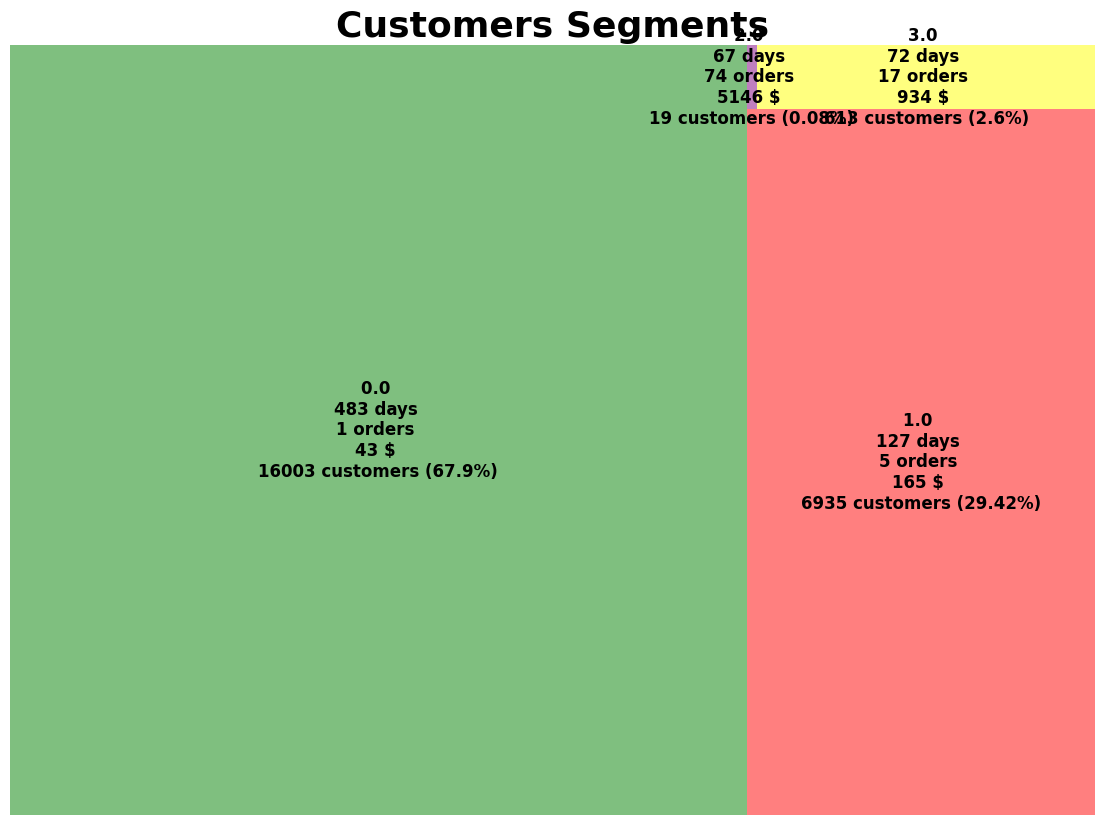

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
               'Best Customers':'green',
               'Get Better Deals for Them':'red' ,
               'Loyal Customers':'purple',
               'Need attention':'yellow',
               'Promising Customers ':'royalblue'
               }

squarify.plot(sizes=rfm_agg_big['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg_big.iloc[i])
                      for i in range(0, len(rfm_agg_big))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg_big, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="prediction",
           hover_name="prediction", size_max=100)
fig.show()

#### 3d Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_new_big, x='Recency', y='Frequency', z='Monetary',
                    color = 'prediction', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),

                  selector=dict(mode='markers'))
fig.show()

In [ ]:
df_new_big.head()

,Recency,Frequency,Monetary,features,prediction
0,1,200,13925.98,"[1.0, 200.0, 13925.98]",2
1,0,217,8976.33,"[0.0, 217.0, 8976.33]",2
2,5,148,6960.08,"[5.0, 148.0, 6960.08]",2
3,445,56,6552.70,"[445.0, 56.0, 6552.7]",2
4,17,62,6497.18,"[17.0, 62.0, 6497.18]",2


#### Others plot

In [ ]:
import plotly.express as px

colors = ['red', 'yellow','blue', 'pink', 'green']
fig = px.pie(rfm_agg_big, values='RecencyMean', names='prediction', title='RecencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','red', 'yellow','blue']
fig = px.pie(rfm_agg_big, values='FrequencyMean', names='prediction', title='FrequencyMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


In [ ]:
import plotly.express as px

colors = ['green','pink','blue', 'yellow','red']
fig = px.pie(rfm_agg_big, values='MonetaryMean', names='prediction', title='MonetaryMean theo RFM_Level', color_discrete_sequence=colors)

# Thêm hiệu ứng kéo cho phần trăm đầu tiên
fig.update_traces(pull=[0, 0.2, 0, 0.1, 0],  # Thay đổi giá trị pull tùy theo phần trăm bạn muốn làm nổi bật
                  hoverinfo='label+percent', textfont_size=15)

fig.show()


### Evaluate

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Model 1: kmeans
# Model 2: hierarchical_cluster
# Model 3: kmeans_deep
# Model 4: Spark

# Tính Silhouette Score
silhouette_score1 = silhouette_score(df_RFM, cluster_labels1)
silhouette_score2 = silhouette_score(df_RFM, cluster_labels2)
silhouette_score3 = silhouette_score(df_RFM, cluster_labels3)

print("Silhouette Score for Model 1 (kmeans):", silhouette_score1)
print("Silhouette Score for Model 2 (hierarchical_cluster):", silhouette_score2)
print("Silhouette Score for Model 3 (kmeans_deep):", silhouette_score3)
print("Silhouette Score for Model 4 (kmeans_spark):", silhouette_score4)

Silhouette Score for Model 1 (kmeans): 0.6373204298176761
Silhouette Score for Model 2 (hierarchical_cluster): 0.6344300154048697
Silhouette Score for Model 3 (kmeans_deep): 0.5212135123151734
Silhouette Score for Model 4 (kmeans_spark): 0.8333110848535601


Model 1 và Model 2 có kết quả gần nhau và tương đối cao, cho thấy cả hai phân cụm tạo ra các cụm tốt với mức độ tách biệt và tương đối tốt giữa các điểm dữ liệu trong cùng một cụm.

Model 3 có Silhouette Score thấp hơn so với Model 1 và Model 2, điều này cho thấy phân cụm bằng deep learning KMeans không hoạt động tốt bằng cách sử dụng thuật toán KMeans truyền thống hoặc hierarchical clustering trong trường hợp này.

Model 4 sử dụng spark cho kết quả tốt nhất.

**Chọn Model 4**

## Bước 6: Deployment & Feedback/ Act

Tùy thuộc vào khách hàng và số lượng chiến dịch công ty có thể cung cấp mà quyết định số cụm là 5 theo RFM hay 4 cụm theo Model 4

Có thể sử dụng thêm phương pháp khác để lựa chọn các model (1,2,3) hay 4 hay vì Silhouette Score

Đối với phân loại các cụm: Cần tập trung đưa ra action cụ thể cho từng cụm cụ thể và càng sớm càng tốt

*  Best Customers (32.22%):

1. Duy trì dịch vụ xuất sắc: Đảm bảo rằng bạn duy trì mức dịch vụ cao cấp để duy trì mức chi tiêu lớn của họ. Cung cấp sản phẩm và dịch vụ chất lượng tốt hơn, và luôn tìm cách nâng cao trải nghiệm của họ.

2. Ưu đãi đặc biệt: Hãy cân nhắc cung cấp các chương trình khuyến mãi và ưu đãi riêng cho họ như phiếu giảm giá đặc biệt hoặc quà tặng độc quyền để kích thích họ mua sắm thường xuyên hơn.

3. Lập kế hoạch sự kiện đặc biệt: Tổ chức các sự kiện hoặc buổi tiệc đặc biệt dành riêng cho nhóm này để tạo dịp để họ mua sắm và tương tác với thương hiệu của bạn.

*  Loyal Customers (14.42%):

1. Chương trình thẻ thành viên hoặc điểm thưởng: Thúc đẩy sự trung thành bằng cách thiết lập chương trình thẻ thành viên hoặc điểm thưởng để khuyến khích họ tiếp tục mua sắm và tích luỹ điểm.
2. Gửi cảm ơn: Gửi thông điệp cảm ơn và quà tặng nhỏ đến họ nhân dịp kỷ niệm hoặc ngày lễ. Điều này giúp tạo mối quan hệ cá nhân mạnh mẽ hơn với họ.
3. Hỏi ý kiến và phản hồi: Thường xuyên thu thập ý kiến của họ và phản hồi một cách tích cực. Họ có thể đóng góp ý kiến về sản phẩm hoặc dịch vụ của bạn, giúp bạn điều chỉnh để đáp ứng nhu cầu của họ.

*  Promising Customers (13.56%):

1. Chào đón khách hàng mới: Chào đón họ và cung cấp một trải nghiệm mua sắm tốt nhất từ lần đầu họ mua hàng. Điều này có thể bao gồm hướng dẫn về sản phẩm hoặc dịch vụ của bạn.
2. Ưu đãi chào mừng: Cung cấp ưu đãi đặc biệt cho các giao dịch đầu tiên của họ để khích lệ họ mua sắm nhiều hơn.
3. Gia tăng tương tác: Sử dụng mạng xã hội và email để tương tác với họ, cung cấp thông tin và cơ hội để họ tham gia vào cộng đồng của bạn.

**Need Attention (21.65%):**

1. Xác định vấn đề: Liên hệ với những khách hàng này để xác định vấn đề cụ thể hoặc lý do họ cảm thấy không hài lòng. Hãy lắng nghe và hiểu về những điều họ muốn thay đổi.
2.  Tùy chỉnh giải pháp: Dựa trên phản hồi của họ, tùy chỉnh sản phẩm hoặc dịch vụ của bạn để đáp ứng nhu cầu cụ thể của họ.
3.  Ưu đãi tái kích hoạt: Cung cấp các ưu đãi hoặc phiếu giảm giá để khuyến khích họ quay lại và mua sắm nhiều hơn.

**Get Better Deals for Them (18.14%):**

1. Chương trình giảm giá thường xuyên: Thiết lập các chương trình giảm giá định kỳ hoặc khuyến mãi sản phẩm với giá ưu đãi để kích thích họ mua sắm thường xuyên hơn.
2. Khuyến mãi đặc biệt: Cung cấp các ưu đãi đặc biệt như giảm giá lớn cho các đơn đặt hàng lớn hoặc mua sắm bộ sản phẩm hoàn chỉnh.
3. Thúc đẩy cross-selling và up-selling: Khuyến khích mua sắm các sản phẩm hoặc dịch vụ có giá trị cao hơn thông qua các gợi ý sản phẩm hoặc ưu đãi kết hợp.